In [4]:
import pandas as pd

## Homework 1:  How can you remove duplicate values in a dataset in Python?

## Homework 2: Determining the overall acceptnce rate

In [6]:
# creating new dataframe
friend_request = pd.DataFrame(columns = ['requestor_id', 'time','sent_to_id'])
friend_request

,requestor_id,time,sent_to_id


In [5]:
request_accepted = pd.DataFrame(columns = ['time', 'acceptor_id', 'requestor_id'])
request_accepted

,time,acceptor_id,requestor_id


##### ACCEPTANCE RATE = ACCEPTED REQUESTS / TOTAL REQUESTS

In [ ]:
# calculating total number of requests
tot_req = len(friend_request)
# calculating number of accepted requests
acc_req = len(request_accepted)
# calculating rate
rate = acc_req / tot_req

In [ ]:
# Using SQL
# SELECT * INTO temp_table
# FROM friend_request
# FULL OUTER JOIN request_accepted
# ON friend_request.requestor_id = accepted_requested.requestor_id
# 
# SELECT COUNT(sent_to_id) / COUNT (acceptor_id) AS Rate
# FROM temp_table


## Homework 3: Identifying card issuers

In [25]:
# creating a list of card numbers
card_No = ['4175004175004172',
           '4917491749174917',
           '346416800707698',
           '376416800707698',
           '37641680070769832112',
           '36641680070769',
           '54545641680070769']
# creating dictionaries to store the card number pattern data
VISA = {"STARTER": ["4"], "length": 16, "issuer": 'VISA'}
AMEX = {"STARTER": ['34', '37'], "length": 15, "issuer": 'AMEX'}
Diners_Club = {"STARTER": ['36'], "length": 14, "issuer": 'Diners_Club'}
VISAELECTRON = {"STARTER": ['4026', '417500', '4405', '4508', '4844', '4913', '4917'], "length": 16, "issuer": 'VISAELECTRON'}

In [29]:
def issuer_recognition(card_num, A, B, C, D):
    if (card_num[0] in A["STARTER"]):
        if (card_num[0:4] in D["STARTER"]) and (len(card_num) == D["length"]):
            print ("the card with number {} is issued by {}".format(card_num, D["issuer"]))
        elif (card_num[0:6] in D["STARTER"]) and (len(card_num) == D["length"]):
            print ("the card with number {} is issued by {}".format(card_num, D["issuer"]))
        elif (len(card_num) == A["length"]):
            print ("the card with number {} is issued by {}".format(card_num, A["issuer"]))
    elif (card_num[0:2] in B["STARTER"]) and (len(card_num) == B["length"]):
        print ("the card with number {} is issued by {}".format(card_num, B["issuer"]))
    elif (card_num[0:2] in C["STARTER"]) and (len(card_num) == C["length"]):
        print("the card with number {} is issued by {}".format(card_num, C["issuer"]))
    else:
        print("the issuer of the card {} cannot be determined".format(card_num))           

In [30]:
for i in card_No:
    issuer_recognition(i, VISA, AMEX, Diners_Club, VISAELECTRON)

the card with number 4175004175004172 is issued by VISAELECTRON
the card with number 4917491749174917 is issued by VISAELECTRON
the card with number 346416800707698 is issued by AMEX
the card with number 376416800707698 is issued by AMEX
the issuer of the card 37641680070769832112 cannot be determined
the card with number 36641680070769 is issued by Diners_Club
the issuer of the card 54545641680070769 cannot be determined


## Homework 4: time series plotting function

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [28]:
# downloading the data
df = pd.read_csv("https://github.com/mingchang0804/python_notebook/raw/master/BA501_python_data.csv")

In [29]:
df.head()

,country,date,experiment_id,order_id,spend_usd,user_id,vertical
0,JP,20170402,12624548,5813140433216629693,16.138855,5006730028073359543,ANDROID_APPS
1,US,20170403,12624549,16333056276711034931,9.990000,5938685669571545259,ANDROID_APPS
2,JP,20170404,12624548,11227119161741298366,19.887087,17623708458399141713,ANDROID_APPS
3,US,20170403,12624548,11927299833124210932,19.990000,18042812344456618148,ANDROID_APPS
4,JP,20170403,12624549,11644727017708872749,88.220093,4325104700699531031,ANDROID_APPS


In [31]:
df.date = pd.to_datetime(df.date, format='%Y%m%d')
df.head()

,country,date,experiment_id,order_id,spend_usd,user_id,vertical
0,JP,2017-04-02,12624548,5813140433216629693,16.138855,5006730028073359543,ANDROID_APPS
1,US,2017-04-03,12624549,16333056276711034931,9.990000,5938685669571545259,ANDROID_APPS
2,JP,2017-04-04,12624548,11227119161741298366,19.887087,17623708458399141713,ANDROID_APPS
3,US,2017-04-03,12624548,11927299833124210932,19.990000,18042812344456618148,ANDROID_APPS
4,JP,2017-04-03,12624549,11644727017708872749,88.220093,4325104700699531031,ANDROID_APPS


In [44]:
def PrintCumulativeTimeSeries(experiment_id, country, vertical):
    red_button_data = df[['date','spend_usd', 'country',
                          'experiment_id', 'vertical']][df.experiment_id == experiment_id]

    # plotting the trend for selected country
    red_button_country = red_button_data[red_button_data.country == country]
    
    red1 = red_button_country.groupby('date')['spend_usd'].sum()
    
    red1 = np.cumsum(red1) 
    
    fig, ax = plt.subplots()
    ax.plot(red1, color="red", label="red")
    
    ax.set_title("Cumulative series for selected Country")
    ax.set_ylabel("Cumulative Total spend")
    ax.grid(True, which="both")

    # format date
    plt.gcf().autofmt_xdate()
    plt.show()  
    
    #plotting trends for selected vertical
    red_button_vert = red_button_data[red_button_data.vertical == vertical]
    
    red2 = red_button_vert.groupby('date')['spend_usd'].sum()
    
    red2 = np.cumsum(red2) 

    fig, ax = plt.subplots()
    ax.plot(red2, color="red", label="red")
    
    ax.set_title("Cumulative series for selected vertical")
    ax.set_ylabel("Cumulative Total spend")
    ax.grid(True, which="both")
    
    # format date
    plt.gcf().autofmt_xdate()
    plt.show()
    
    # plotting for the combination of selected country and vertical
    red_button = red_button_data[(red_button_data.country == country)
                                 & (red_button_data.vertical == vertical)]
 
    red3 = red_button.groupby('date')['spend_usd'].sum()
    
    red3 = np.cumsum(red3) 
   
    fig, ax = plt.subplots()
    ax.plot(red3, color="red", label="red")
  
    ax.set_title("Cumulative series for both selected Criteria")
    ax.set_ylabel("Cumulative Total spend")
    ax.grid(True, which="both")

    # format date
    plt.gcf().autofmt_xdate()
    plt.show() 

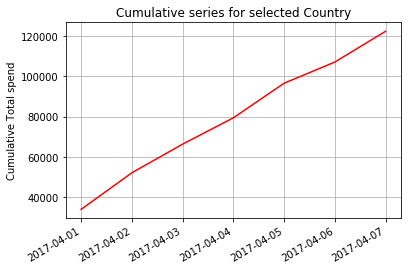

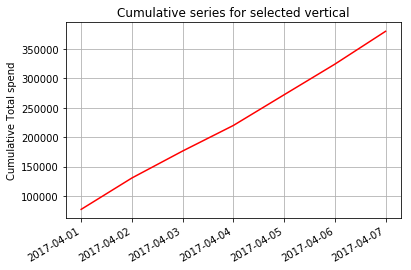

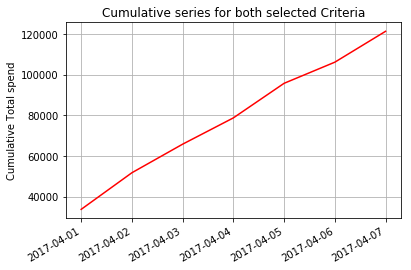

In [49]:
# plotting for experiment_id = 12624549, Japan, Android apps
PrintCumulativeTimeSeries(12624549, 'JP', 'ANDROID_APPS')